# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The market for used cars has progressed significantly as more people choose personal vehicles. The second-hand automobile market has significantly grown after the covid had struck due to reduction in the cash flow and economic crisis and semiconductor chip shortages that to a mass reduction in the vehicle production which made people look for afforable second-hand vehicles instead of the brand-new ones.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd #
import seaborn as sns
import plotly.express as px

In [34]:
# Reading the dataset
data = pd.read_csv("vehicles.csv")

In [35]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [37]:
# fig = px.scatter(data , x = np.log(data['size']),y= np.log(data['fuel']), trendline='ols')
# fig.show()

In [38]:
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [39]:
data["price"].value_counts()

0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64

<Axes: >

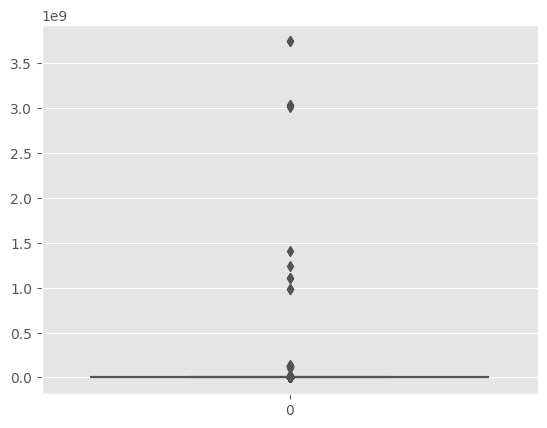

In [42]:
sns.boxplot(data['price'])

In [41]:
q_low = data["price"].quantile(0.01)
q_hi  = data["price"].quantile(0.99)
print (q_low,q_hi)

0.0 66995.0


In [44]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print (lower,upper)

-24978.625 57364.375


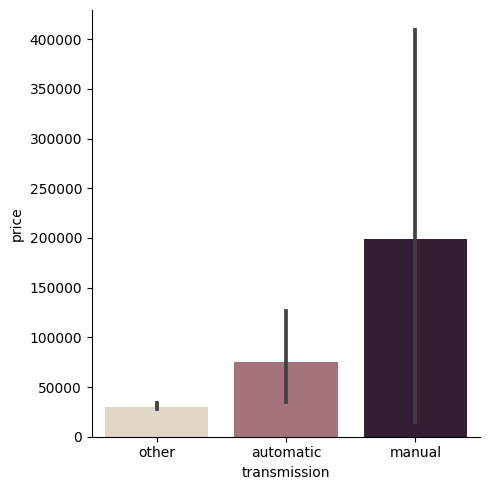

In [11]:
sns.catplot(x="transmission", y="price", kind="bar", palette="ch:.25", data=data)

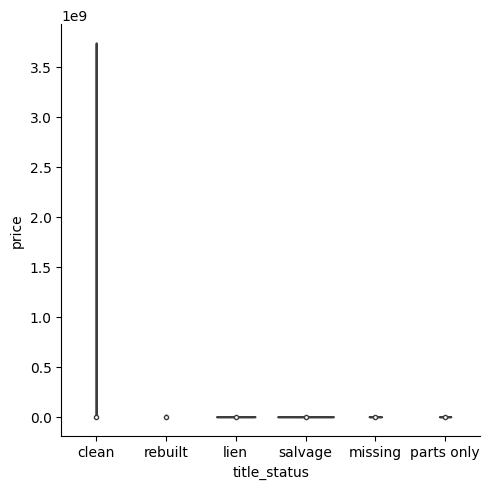

In [14]:
sns.catplot(x="title_status", y="price",kind="violin", data=data)

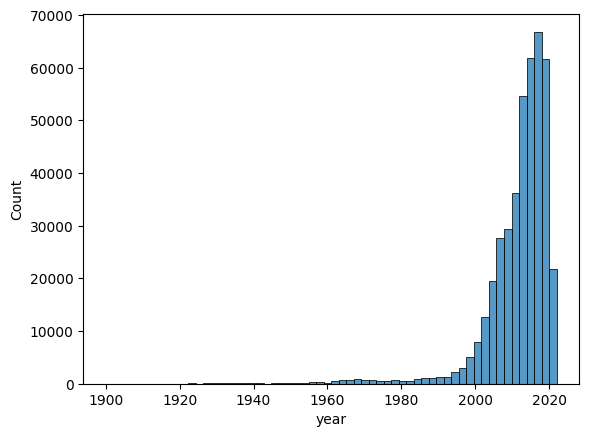

In [85]:
# bins = "auto"
# x = np.array(data['year'])
# ax1 = sns.histplot(data=data, x="year", bins=60)

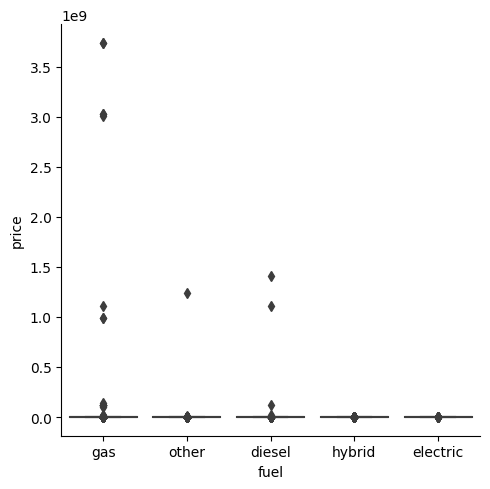

In [95]:
# sns.catplot(data=data, x="fuel", y="price",kind="box")

In [86]:
# sns.distplot(data['odometer'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

In [87]:
# plt.figure(figsize=(10,5))
# sns.stripplot(x='drive',y='model',data=data,hue='condition')

In [88]:
# year_price = data.groupby('year')['price'].mean()
# fig = px.bar(year_price , color = year_price.index )
# fig.show()

In [89]:
## Data processing
# plt.figure(figsize=(15,5))
# sns.countplot(data,x='year',bins='auto')
# plt.title('Distribution of Year Column')

In [15]:
data=data.drop(["VIN","id","year","state","region","model"],axis=1)

In [16]:
numerical_cols = list(data.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
numerical_cols.remove('price')
numerical_cols

['odometer']

In [17]:
categorical_cols = list(data.select_dtypes(include=['object']).columns)
categorical_cols

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [ ]:
data['cylinders'] = data['cylinders'].str.replace(r'\D', '', regex=True)

In [ ]:
# # Impute missing values using SimpleImputer
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
# data[numerical_cols] = imputer.transform(data[numerical_cols])

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mode')
# data[categorical_cols] = imputer.fit_transform(data[categorical_cols])
# data[categorical_cols] = imputer.transform(data[categorical_cols])

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder()

# manufacturer_encoded = onehot.fit_transform(data[['manufacturer']])
# df_manufacturer = pd.DataFrame(manufacturer_encoded.toarray(), columns = onehot.categories_)

# condition_encoded = onehot.fit_transform(data[['condition']])
# df_condition = pd.DataFrame(condition_encoded.toarray(), columns = onehot.categories_)

# fuel_encoded = onehot.fit_transform(data[['fuel']])
# df_fuel = pd.DataFrame(fuel_encoded.toarray(), columns = onehot.categories_)

# transmission_encoded = onehot.fit_transform(data[['transmission']])
# df_transmission = pd.DataFrame(transmission_encoded.toarray(), columns = onehot.categories_)

# drive_encoded = onehot.fit_transform(data[['drive']])
# df_drive = pd.DataFrame(drive_encoded.toarray(), columns = onehot.categories_)

# paint_color_encoded = onehot.fit_transform(data[['paint_color']])
# df_paint_color = pd.DataFrame(paint_color_encoded.toarray(), columns = onehot.categories_)

# type_encoded = onehot.fit_transform(data[['type']])
# df_type = pd.DataFrame(type_encoded.toarray(), columns = onehot.categories_)

# title_status_encoded = onehot.fit_transform(data[['title_status']])
# df_title_status = pd.DataFrame(title_status_encoded.toarray(), columns = onehot.categories_)

In [ ]:
# li = [df_manufacturer, df_condition, df_fuel, df_transmission, df_drive,df_paint_color,df_type, df_title_status ]
# for i in li :
#     X_df = pd.concat([data, i], axis = 1)
# X_df

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='ggplot')

In [18]:
from sklearn.model_selection import train_test_split
data_modeling = data.copy()

X = data_modeling.drop('price', axis = 1)
y = data_modeling['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)


In [22]:
# numerical pipeline
num_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'median'),
                             StandardScaler()
                            )
# nominal pipeline
nom_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder()
                            )

# Combine the numerical pipeline, nominal pipeline, and ordinal pipeline in a one Pipeline
preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, numerical_cols),
                                  ('nominal', nom_pipeline, categorical_cols)
                                ])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['odometer']),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['manufacturer', 'condition', 'cylinders',
                                  'fuel', 'title_status', 'transmission',
                                  'drive', 'size', 'type', 'paint_color'])])

In [23]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

**Linear Regression**

In [24]:
# Linear Regression Model
lin_reg = LinearRegression()

# Model Fitting
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [25]:
# Training the Linear Regression Model

# Predictions of X_train
lr_pred_tarin = lin_reg.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lr_pred_tarin)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lr_pred_tarin))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, lr_pred_tarin) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Mean Absolute Error      :  150396.30410752908
Root Mean Squared  Error :  9359000.001618195
R-Squered Training       :  0.06 %


In [26]:
# Cross Validation for Linear Regression Model
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Linear Regression Accuracy          :  {lin_reg_scores}')
print(f'Linear Regression Standard Deviation:  {round(lin_reg_scores.std(), 2)}')
print(f'Linear Regression Accuracy Mean     :  {round(lin_reg_scores.mean() * 100, 2)} %')

Linear Regression Accuracy          :  [-1.79195249e+01 -2.69487243e-04 -1.10513423e-01 -1.35939046e+01
 -1.74274502e-03 -8.91481925e-04 -6.18375512e-05 -4.70035982e-02]
Linear Regression Standard Deviation:  6.9
Linear Regression Accuracy Mean     :  -395.92 %


In [27]:
#Testing the Linear Regression Model

# Predictions of X_test
lr_pred_test = lin_reg.predict(X_test_transformed)

print("Tasting Accuracy for Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lr_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lr_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lr_pred_test) * 100, 2)} %')

Tasting Accuracy for Linear Regression: 

Mean Absolute Error      :  242053.0529575707
Root Mean Squared  Error :  19786333.002565272
R-Squered Testing        :  -0.01 %


LightGBM

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
model_lgb = lgb.LGBMRegressor()

In [31]:
param={
    'num_leaves':[32,64],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[50, 100]
}

In [32]:
GS_LGB = GridSearchCV(model_lgb, param, cv=10, n_jobs=n_thread)
GS_LGB.fit(X_train, y_train)

NameError: ignored

In [61]:
# data['model'].value_counts()[data['model'].value_counts() > 10]

In [64]:
# data['model'].nunique()

In [62]:
# categorical_variables = ["condition","manufacturer","drive","size","paint_color","type","model"]

In [63]:
# df = data[["manufacturer","condition","cylinders","drive","size","paint_color","type","model"]]

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.